This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file WalmartStoresales. Within this file you will find the following fields:\

- Store - the store number
- Date - the week of sales
- Weekly_Sales - sales for the given store
- Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week
- Temperature - Temperature on the day of sale
- Fuel_Price - Cost of fuel in the region
- CPI – Prevailing consumer price index
- Unemployment - Prevailing unemployment rate
- Holiday Events\
Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

In [107]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
pwd = os.getcwd()

In [43]:
df = pd.read_csv(pwd + '\\Walmart.csv')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [6]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

# Visualisation

In [7]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

<AxesSubplot:title={'center':'Correlation Matrix'}>

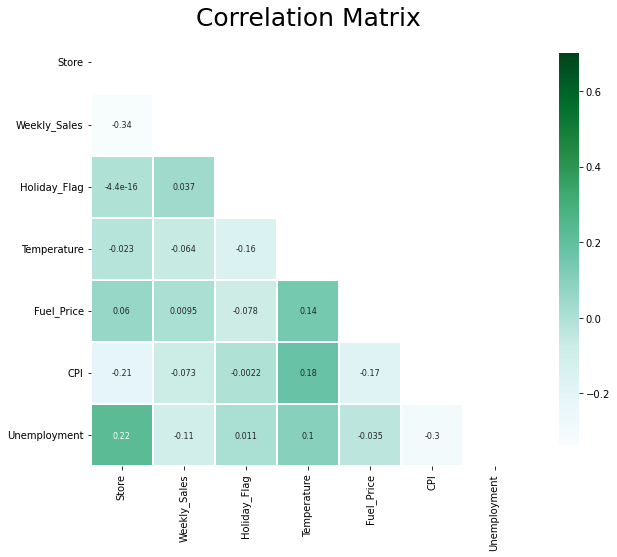

In [8]:
features = ['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']
       
# np.zeros_like return an array of zeros with the same shape as given array
mask = np.zeros_like(df[features].corr(), dtype=np.bool)
# https://www.youtube.com/watch?v=cIHIM3CoVgw (makes it so the matrix is in triangular form)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(12, 8))
plt.title('Correlation Matrix', fontsize=25)

sns.heatmap(df[features].corr(), linewidths=0.25, vmax=0.7, square=True, cmap='BuGn', linecolor='w', annot=True, annot_kws={'size':8}, mask=mask, cbar_kws={'shrink': .9})

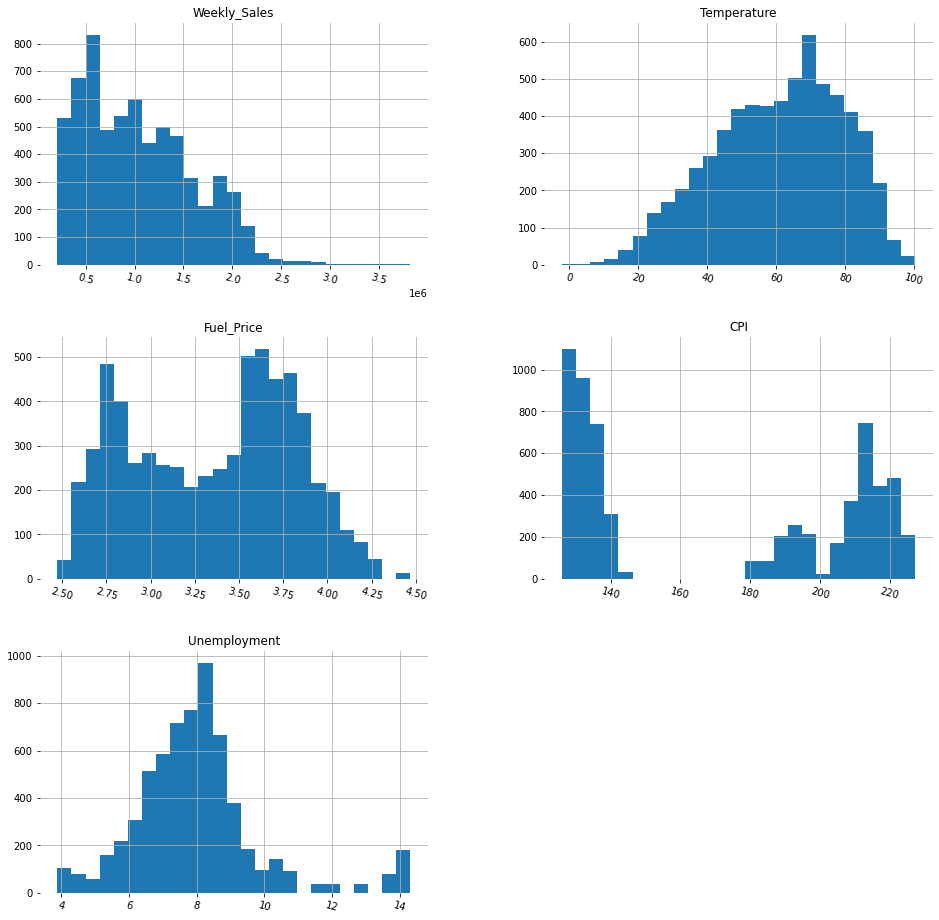

In [9]:
df1=df[['Date', 'Weekly_Sales', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment']]
h = df1.hist(bins=25,figsize=(16,16),xlabelsize='10',ylabelsize='10',xrot=-15)
sns.despine(left=True, bottom=True)
[x.title.set_size(12) for x in h.ravel()];
[x.yaxis.tick_left() for x in h.ravel()];

<AxesSubplot:xlabel='Holiday_Flag', ylabel='Weekly_Sales'>

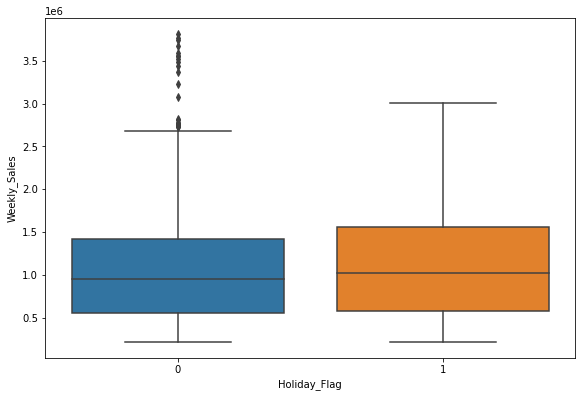

In [10]:
fig=plt.figure(figsize=(9.5,6.25))
sns.boxplot(x=df['Holiday_Flag'], y=df['Weekly_Sales'])

<AxesSubplot:xlabel='Unemployment', ylabel='Weekly_Sales'>

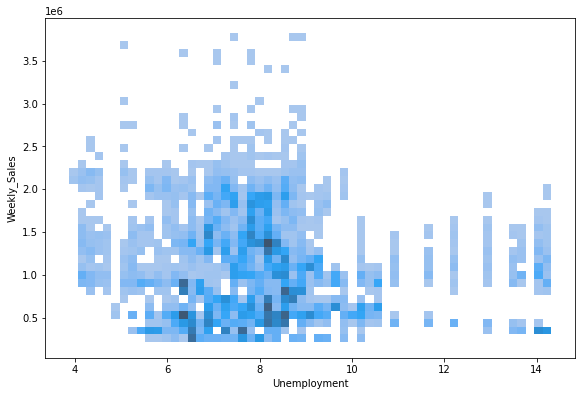

In [11]:
fig=plt.figure(figsize=(9.5,6.25))
sns.histplot(data=df, x="Unemployment", y="Weekly_Sales")

Around 8% unemployemt the sales are the lowest, but some sales are high while at unemployment around 11% and above the sales are only low

Text(0.5, 1.0, 'Weekly Sales on non Holiday days')

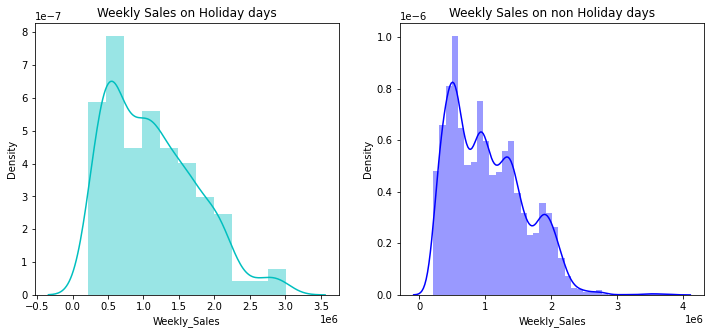

In [12]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.distplot(df[(df.Holiday_Flag == 1)]["Weekly_Sales"],color='c',ax=ax)
ax.set_title('Weekly Sales on Holiday days')

ax=f.add_subplot(122)
sns.distplot(df[(df.Holiday_Flag == 0)]['Weekly_Sales'],color='b',ax=ax)
ax.set_title('Weekly Sales on non Holiday days')

There are more sales on holiday days but not as expensive purchases as non holiday days

<AxesSubplot:xlabel='Temperature', ylabel='Count'>

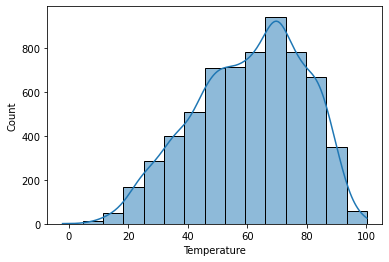

In [13]:
sns.histplot(df['Temperature'], kde=True, bins=15)

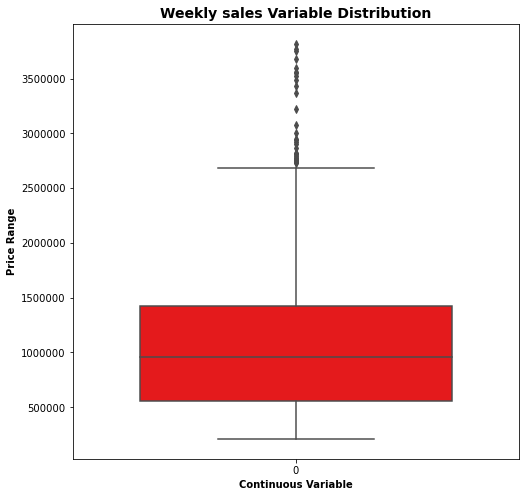

In [14]:
plt.rcParams['figure.figsize'] = [8,8]
sns.boxplot(data=df['Weekly_Sales'], orient="v", palette="Set1" ,whis=1.5,saturation=1, width=0.7)
plt.title("Weekly sales Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Price Range", fontweight = 'bold')
plt.xlabel("Continuous Variable", fontweight = 'bold')
plt.ticklabel_format(style='plain', axis='y')

In [15]:
df_modified = df.copy()

In [16]:
df_modified['Fuel_Price_Rounded'] = df_modified['Fuel_Price'].round(decimals=1)

<AxesSubplot:xlabel='Fuel_Price_Rounded', ylabel='Weekly_Sales'>

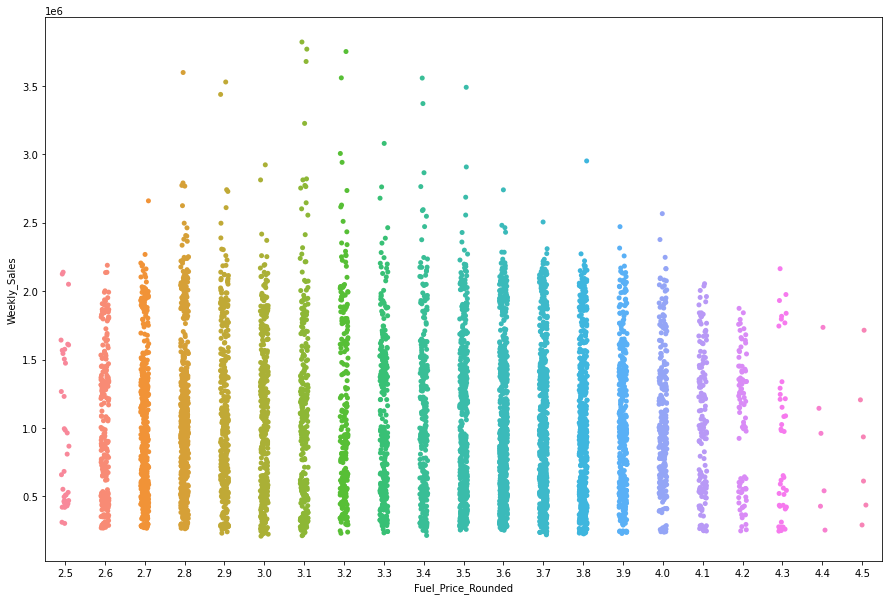

In [17]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Fuel_Price_Rounded', y='Weekly_Sales', data=df_modified)

There is a little colleration between the fuel price and weekly sales but not a lot.

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

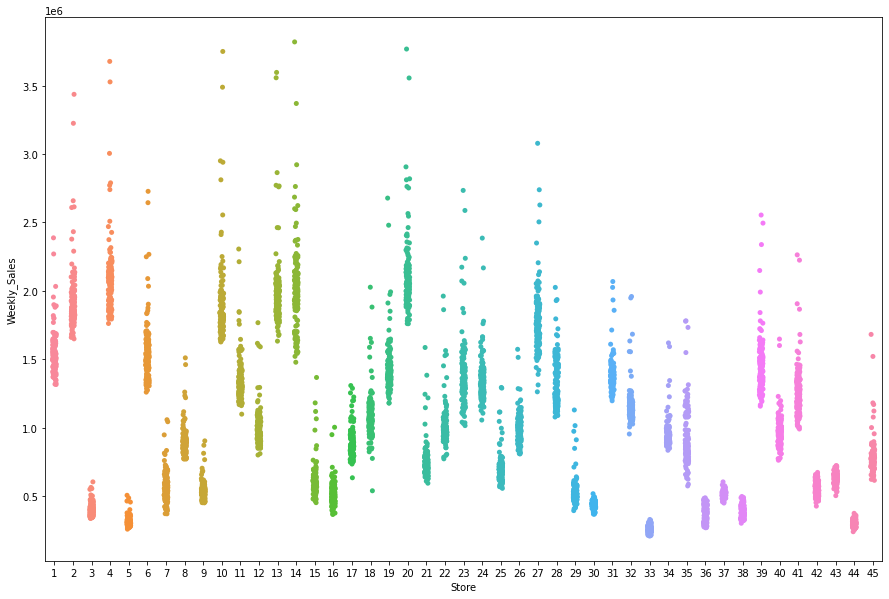

In [18]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Store', y='Weekly_Sales', data=df_modified)

Store 4, 20, 14 make the most money, followed closly by 2, 10, 13

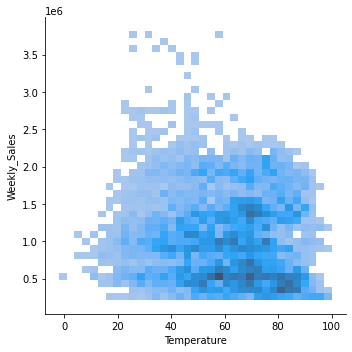

In [19]:
sns.displot(x='Temperature', y='Weekly_Sales', data=df)

When temperature is higher, the sales are lower

In [20]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


# Train test

In [101]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)
df_train.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1516,11,30-09-2011,1190515.83,0,84.40,3.355,220.085696,7.567
1850,13,31-08-2012,2073855.42,0,79.18,3.624,130.885355,5.765
6082,43,22-07-2011,597354.39,0,88.58,3.651,207.253811,10.641
1643,12,10-06-2011,996937.95,0,78.72,3.981,129.035710,13.736
2869,21,09-04-2010,751181.40,0,65.74,2.770,210.283165,8.200


In [102]:
scaler = preprocessing.StandardScaler()

In [103]:
cols = ['Store','Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']

In [104]:
df_train[cols] = scaler.fit_transform(df_train[cols])

In [105]:
df_train

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1516,-0.925575,30-09-2011,0.240595,-0.280257,1.286293,-0.004662,1.224032,-0.238298
1850,-0.771103,31-08-2012,1.803675,-0.280257,1.003347,0.578996,-1.039207,-1.204246
6082,1.545962,22-07-2011,-0.809011,-0.280257,1.512867,0.637579,0.898454,1.409496
1643,-0.848339,10-06-2011,-0.101943,-0.280257,0.978413,1.353591,-1.086138,3.068547
2869,-0.153219,09-04-2010,-0.536812,-0.280257,0.274841,-1.273956,0.975317,0.101017
...,...,...,...,...,...,...,...,...
6026,1.545962,25-06-2010,-0.759745,-0.280257,1.507447,-1.527815,0.797308,0.847724
79,-1.697930,12-08-2011,0.832729,-0.280257,1.631033,0.609372,1.110365,-0.026561
3927,0.387429,13-05-2011,0.351721,-0.280257,0.556161,1.833102,-1.084785,3.068547
5955,1.468727,11-11-2011,-0.728019,-0.280257,-0.292136,0.693992,-1.066322,-0.073733


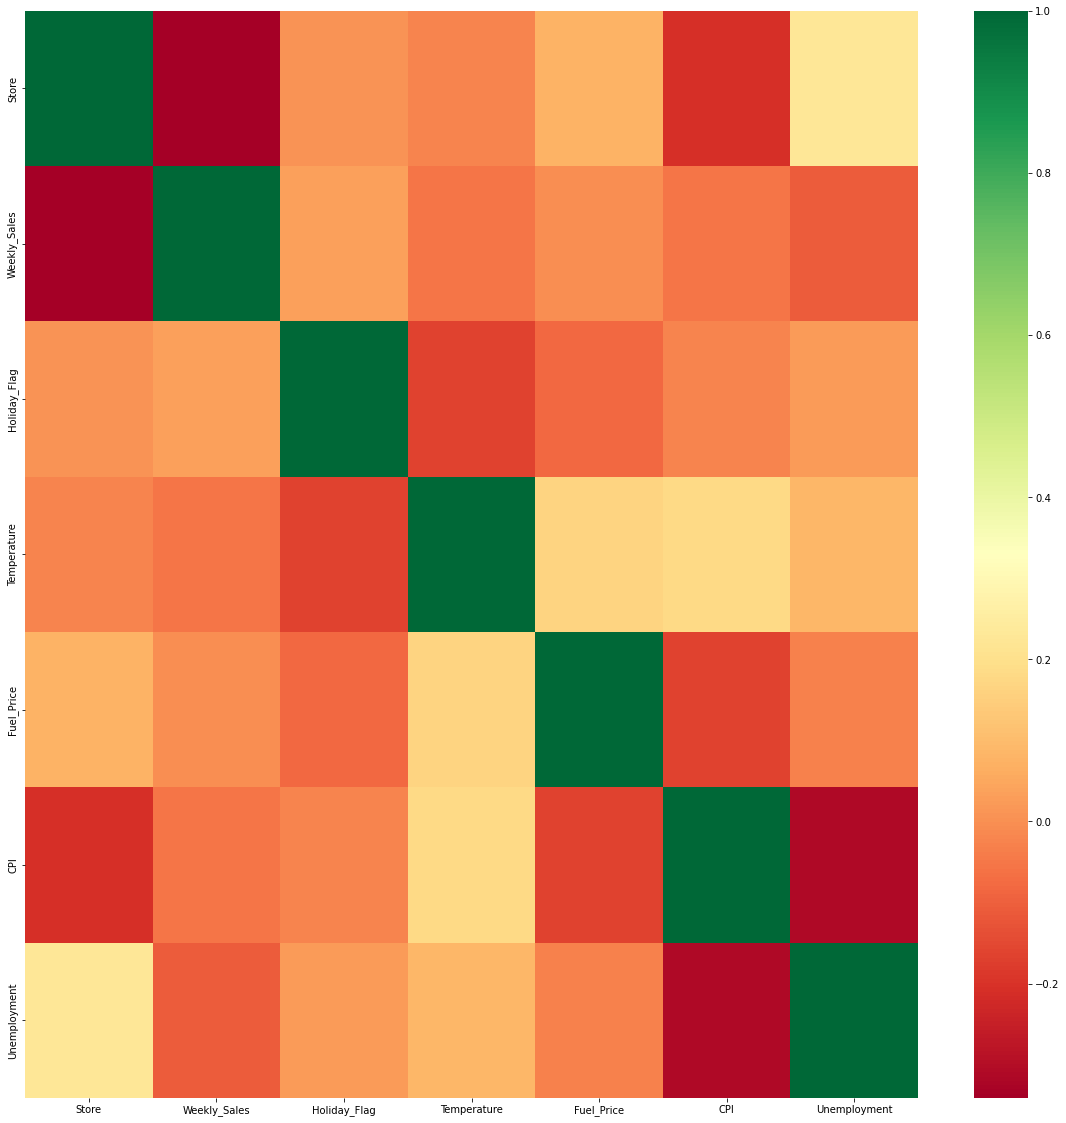

In [106]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr(), cmap='RdYlGn')
plt.show()

In [107]:
df_train = df_train.drop(['Date'], axis=1)

In [108]:
X_train = df_train
y_train = df_train.pop('Weekly_Sales')

# Building a model

In [111]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=6)
rfe = rfe.fit(X_train, y_train)

In [112]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Store', True, 1),
 ('Holiday_Flag', True, 1),
 ('Temperature', True, 1),
 ('Fuel_Price', True, 1),
 ('CPI', True, 1),
 ('Unemployment', True, 1)]

In [114]:
col_sup = X_train.columns[rfe.support_]

In [115]:
X_train_rfe = X_train[col_sup]

In [116]:
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     122.5
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          7.64e-144
Time:                        19:58:18   Log-Likelihood:                -6050.0
No. Observations:                4504   AIC:                         1.211e+04
Df Residuals:                    4497   BIC:                         1.216e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.245e-17      0.014  -4.52e-15   

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
4,CPI,1.25
5,Unemployment,1.19
2,Temperature,1.14
3,Fuel_Price,1.09
0,Store,1.08
1,Holiday_Flag,1.03


In [118]:
X_train_rfe1 = X_train_rfe.drop('Fuel_Price', 1)

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     147.0
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          6.11e-145
Time:                        19:58:57   Log-Likelihood:                -6050.0
No. Observations:                4504   AIC:                         1.211e+04
Df Residuals:                    4498   BIC:                         1.215e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.245e-17      0.014  -4.52e-15   

In [120]:
X_train_rfe2 = X_train_rfe1.drop('Temperature', 1)

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

print(lm_rfe2.summary())


                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.139
Method:                 Least Squares   F-statistic:                     182.8
Date:                Tue, 18 Oct 2022   Prob (F-statistic):          2.52e-145
Time:                        19:59:59   Log-Likelihood:                -6051.8
No. Observations:                4504   AIC:                         1.211e+04
Df Residuals:                    4499   BIC:                         1.215e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -6.245e-17      0.014  -4.52e-15   

# Data prep

In [21]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [44]:
df['Year'] = df['Date'].apply(lambda x: x.split('-')[2])
df['Month'] = df['Date'].apply(lambda x: x.split('-')[1])
df['Day'] = df['Date'].apply(lambda x: x.split('-')[0])

In [45]:
df.drop('Date', inplace=True, axis=1)

In [48]:
dummies=pd.get_dummies(df['Store'], drop_first=True)

In [50]:
df = pd.concat([df, dummies],
 axis=1)
df = df.drop('Store', axis=1)
df

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,2,...,36,37,38,39,40,41,42,43,44,45
0,1643690.90,0,42.31,2.572,211.096358,8.106,2010,02,05,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,1,38.51,2.548,211.242170,8.106,2010,02,12,0,...,0,0,0,0,0,0,0,0,0,0
2,1611968.17,0,39.93,2.514,211.289143,8.106,2010,02,19,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,0,46.63,2.561,211.319643,8.106,2010,02,26,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,0,46.50,2.625,211.350143,8.106,2010,03,05,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,0,64.88,3.997,192.013558,8.684,2012,09,28,0,...,0,0,0,0,0,0,0,0,0,1
6431,733455.07,0,64.89,3.985,192.170412,8.667,2012,10,05,0,...,0,0,0,0,0,0,0,0,0,1
6432,734464.36,0,54.47,4.000,192.327265,8.667,2012,10,12,0,...,0,0,0,0,0,0,0,0,0,1
6433,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,0,...,0,0,0,0,0,0,0,0,0,1


In [51]:
dummies=pd.get_dummies(df['Holiday_Flag'], drop_first=True)

In [52]:
df = pd.concat([df, dummies],
 axis=1)
df = df.drop('Holiday_Flag', axis=1)
df

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,2,3,...,37,38,39,40,41,42,43,44,45,1
0,1643690.90,42.31,2.572,211.096358,8.106,2010,02,05,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1641957.44,38.51,2.548,211.242170,8.106,2010,02,12,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1611968.17,39.93,2.514,211.289143,8.106,2010,02,19,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1409727.59,46.63,2.561,211.319643,8.106,2010,02,26,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1554806.68,46.50,2.625,211.350143,8.106,2010,03,05,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,713173.95,64.88,3.997,192.013558,8.684,2012,09,28,0,0,...,0,0,0,0,0,0,0,0,1,0
6431,733455.07,64.89,3.985,192.170412,8.667,2012,10,05,0,0,...,0,0,0,0,0,0,0,0,1,0
6432,734464.36,54.47,4.000,192.327265,8.667,2012,10,12,0,0,...,0,0,0,0,0,0,0,0,1,0
6433,718125.53,56.47,3.969,192.330854,8.667,2012,10,19,0,0,...,0,0,0,0,0,0,0,0,1,0


# Splitting the Data

In [72]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=100)

In [54]:
scaler_cols = ['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Day']

In [80]:
scaler_cols = df_train.columns.tolist()

In [73]:
scaler = preprocessing.StandardScaler()

In [82]:
df_train[scaler_cols] = scaler.fit_transform(df_train[scaler_cols])

In [91]:
df_test[scaler_cols] = scaler.fit_transform(df_test[scaler_cols])

In [83]:
df_train.head()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Year,Month,Day,2,3,...,37,38,39,40,41,42,43,44,45,1
1516,0.240595,1.286293,-0.004662,1.224032,-0.238298,0.044693,0.778916,1.631138,-0.154496,-0.147576,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
1850,1.803675,1.003347,0.578996,-1.039207,-1.204246,1.294978,0.470554,1.745868,-0.154496,-0.147576,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
6082,-0.809011,1.512867,0.637579,0.898454,1.409496,0.044693,0.162192,0.713295,-0.154496,-0.147576,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,6.536678,-0.145997,-0.145202,-0.280257
1643,-0.101943,0.978413,1.353591,-1.086138,3.068547,0.044693,-0.146171,-0.663470,-0.154496,-0.147576,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
2869,-0.536812,0.274841,-1.273956,0.975317,0.101017,-1.205593,-0.762896,-0.778200,-0.154496,-0.147576,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257


In [84]:
y_train = df_train.pop('Weekly_Sales')
X_train = df_train

In [92]:
y_test = df_test.pop('Weekly_Sales')
X_test = df_test

In [113]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=52)
rfe = rfe.fit(X_train, y_train)

In [114]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Temperature', True, 1),
 ('Fuel_Price', True, 1),
 ('CPI', True, 1),
 ('Unemployment', True, 1),
 ('Year', True, 1),
 ('Month', True, 1),
 ('Day', True, 1),
 (2, True, 1),
 (3, True, 1),
 (4, True, 1),
 (5, True, 1),
 (6, True, 1),
 (7, True, 1),
 (8, True, 1),
 (9, True, 1),
 (10, True, 1),
 (11, True, 1),
 (12, True, 1),
 (13, True, 1),
 (14, True, 1),
 (15, True, 1),
 (16, True, 1),
 (17, True, 1),
 (18, True, 1),
 (19, True, 1),
 (20, True, 1),
 (21, True, 1),
 (22, True, 1),
 (23, True, 1),
 (24, True, 1),
 (25, True, 1),
 (26, True, 1),
 (27, True, 1),
 (28, True, 1),
 (29, True, 1),
 (30, True, 1),
 (31, True, 1),
 (32, True, 1),
 (33, True, 1),
 (34, True, 1),
 (35, True, 1),
 (36, True, 1),
 (37, True, 1),
 (38, True, 1),
 (39, True, 1),
 (40, True, 1),
 (41, True, 1),
 (42, True, 1),
 (43, True, 1),
 (44, True, 1),
 (45, True, 1),
 (1, True, 1)]

In [115]:
col_sup = X_train.columns[rfe.support_]
col_sup

Index([ 'Temperature',   'Fuel_Price',          'CPI', 'Unemployment',
               'Year',        'Month',          'Day',              2,
                    3,              4,              5,              6,
                    7,              8,              9,             10,
                   11,             12,             13,             14,
                   15,             16,             17,             18,
                   19,             20,             21,             22,
                   23,             24,             25,             26,
                   27,             28,             29,             30,
                   31,             32,             33,             34,
                   35,             36,             37,             38,
                   39,             40,             41,             42,
                   43,             44,             45,              1],
      dtype='object')

In [116]:
X_train_rfe = X_train[col_sup]
X_train_rfec = sm.add_constant(X_train_rfe)
lm_rfe = sm.OLS(y_train, X_train_rfec).fit()

print(lm_rfe.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     1096.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:05:23   Log-Likelihood:                -478.52
No. Observations:                4504   AIC:                             1063.
Df Residuals:                    4451   BIC:                             1403.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.076e-14      0.004   2.67e-12   

In [117]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,CPI,1058.49
43,38,130.95
17,12,125.10
47,42,123.19
33,28,121.60
39,34,120.32
18,13,115.99
22,17,115.64
9,4,113.15
38,33,113.13


In [118]:
X_train_rfe1 = X_train_rfe.drop('CPI', 1)

X_train_rfe1c = sm.add_constant(X_train_rfe1)
lm_rfe1 = sm.OLS(y_train, X_train_rfe1c).fit()

print(lm_rfe1.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1113.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:06:04   Log-Likelihood:                -487.42
No. Observations:                4504   AIC:                             1079.
Df Residuals:                    4452   BIC:                             1412.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.915e-15      0.004   9.69e-13   

In [119]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe1.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe1.values, i) for i in range(X_train_rfe1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
2,Unemployment,20.42
42,38,5.89
32,28,5.67
16,12,5.66
3,Year,5.47
1,Fuel_Price,4.00
27,23,3.00
44,40,2.90
38,34,2.66
47,43,2.63


In [121]:
X_train_rfe2 = X_train_rfe1.drop('Unemployment', 1)

X_train_rfe2c = sm.add_constant(X_train_rfe2)
lm_rfe2 = sm.OLS(y_train, X_train_rfe2c).fit()

print(lm_rfe2.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1129.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:07:04   Log-Likelihood:                -501.04
No. Observations:                4504   AIC:                             1104.
Df Residuals:                    4453   BIC:                             1431.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.581e-16      0.004  -1.38e-13      

In [122]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
1,Fuel_Price,3.91
2,Year,3.49
29,26,2.07
27,24,2.06
45,42,2.03
41,38,2.03
34,31,2.02
28,25,2.02
25,22,2.01
30,27,2.00


In [123]:
X_train_rfe3 = X_train_rfe2.drop('Year', 1)

X_train_rfe3c = sm.add_constant(X_train_rfe3)
lm_rfe3 = sm.OLS(y_train, X_train_rfe3c).fit()

print(lm_rfe3.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1152.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:07:52   Log-Likelihood:                -501.08
No. Observations:                4504   AIC:                             1102.
Df Residuals:                    4454   BIC:                             1423.
Df Model:                          49                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.843e-16      0.004  -1.69e-13      

In [125]:
X_train_rfe2

,Temperature,Fuel_Price,Year,Month,Day,2,3,4,5,6,...,37,38,39,40,41,42,43,44,45,1
1516,1.286293,-0.004662,0.044693,0.778916,1.631138,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
1850,1.003347,0.578996,1.294978,0.470554,1.745868,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
6082,1.512867,0.637579,0.044693,0.162192,0.713295,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,6.536678,-0.145997,-0.145202,-0.280257
1643,0.978413,1.353591,0.044693,-0.146171,-0.663470,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
2869,0.274841,-1.273956,-1.205593,-0.762896,-0.778200,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6026,1.507447,-1.527815,-1.205593,-0.146171,1.057486,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,6.536678,-0.145997,-0.145202,-0.280257
79,1.631033,0.609372,0.044693,0.470554,-0.434009,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
3927,0.556161,1.833102,0.044693,-0.454533,-0.319279,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,-0.155996,-0.152983,-0.145997,-0.145202,-0.280257
5955,-0.292136,0.693992,0.044693,1.395641,-0.548739,-0.154496,-0.147576,-0.150687,-0.145997,-0.152983,...,-0.148359,-0.155248,-0.155996,-0.145202,-0.147576,6.410418,-0.152983,-0.145997,-0.145202,-0.280257


In [127]:
X_train_rfe4 = X_train_rfe3.drop(6, 1)

X_train_rfe4c = sm.add_constant(X_train_rfe4)
lm_rfe4 = sm.OLS(y_train, X_train_rfe4c).fit()

print(lm_rfe4.summary())

                            OLS Regression Results                            
Dep. Variable:           Weekly_Sales   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     1176.
Date:                Fri, 11 Nov 2022   Prob (F-statistic):               0.00
Time:                        14:09:13   Log-Likelihood:                -501.09
No. Observations:                4504   AIC:                             1100.
Df Residuals:                    4455   BIC:                             1414.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -6.683e-16      0.004  -1.65e-13      

In [128]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by='VIF', ascending=False)
vif

,Features,VIF
0,Temperature,1.66
27,26,1.57
8,7,1.54
25,24,1.53
17,16,1.52
26,25,1.52
18,17,1.52
43,42,1.50
39,38,1.50
32,31,1.50


In [97]:
# Not mine

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(X_train.loc[:,X_train.nunique()>=50].columns.values,2,replace=False)
def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(rc):
        plt.subplot(2,3,e+1)
        plt.scatter(y=y_train, x=X_train[i], label='Actual')
        plt.scatter(y=pred1, x=X_train[i], label='Prediction')
        plt.legend()
    plt.show()

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(y_train, pred1),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_train-pred1)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_train, pred1),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_train, pred1)),20))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(y_test, pred2),20))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(y_test-pred2)),20))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(y_test, pred2),20))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(y_test, pred2)),20))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(y_test, pred2),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(y_train-pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(y_test-pred2)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(y_train, pred1),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(y_test, pred2), 20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(y_train, pred1)),20)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(y_test, pred2)),20)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((y_train - pred1))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(y_train,pred1)
    plt.plot([y_train.min(),y_train.max()],[y_train.min(),y_train.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

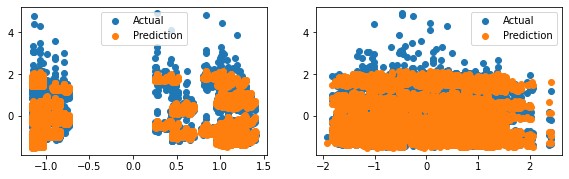



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9275885189476368
Residual Sum of Squares (RSS) on Training set  ---> 326.1413106598437
Mean Squared Error (MSE) on Training set       ---> 0.07241148105236317
Root Mean Squared Error (RMSE) on Training set ---> 0.26909381459328113

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9182937043910209
Residual Sum of Squares (RSS) on Training set  ---> 157.7748568209388
Mean Squared Error (MSE) on Training set       ---> 0.08170629560897918
Root Mean Squared Error (RMSE) on Training set ---> 0.2858431311208635

--------------------Residual Plots--------------------


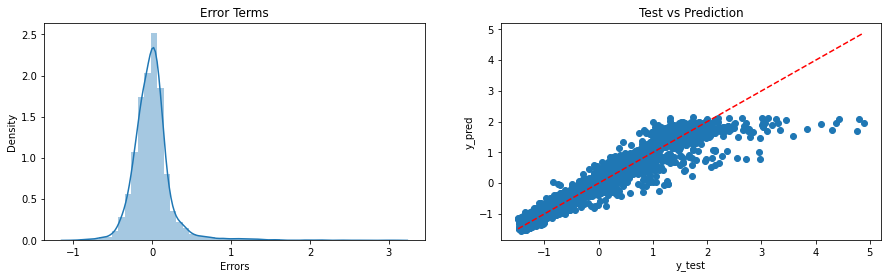

In [98]:
MLR = LinearRegression().fit(X_train, y_train)
pred1 = MLR.predict(X_train)
pred2 = MLR.predict(X_test)

Evaluate(0, pred1, pred2)

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Intercept of the Regresion Model was found to be  1.0534499186223065e-14


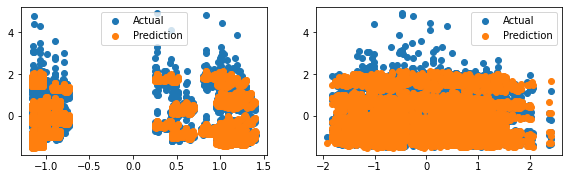



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9275758821496279
Residual Sum of Squares (RSS) on Training set  ---> 326.198226798076
Mean Squared Error (MSE) on Training set       ---> 0.07242411785037212
Root Mean Squared Error (RMSE) on Training set ---> 0.26911729385227573

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.9182250515386318
Residual Sum of Squares (RSS) on Training set  ---> 157.9074254789021
Mean Squared Error (MSE) on Training set       ---> 0.08177494846136825
Root Mean Squared Error (RMSE) on Training set ---> 0.28596319424249034

--------------------Residual Plots--------------------


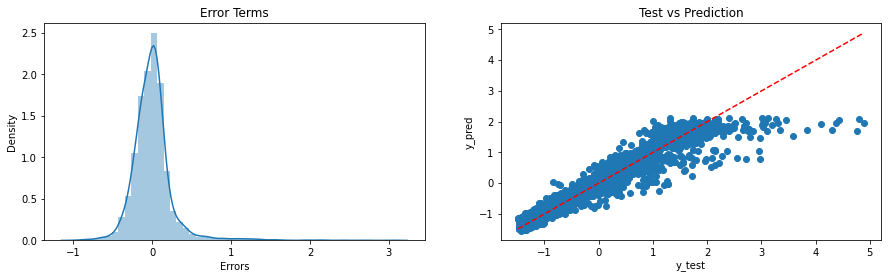

In [108]:

RLR = Ridge().fit(X_train, y_train)
pred1 = RLR.predict(X_train)
pred2 = RLR.predict(X_test)

Evaluate(1, pred1, pred2)

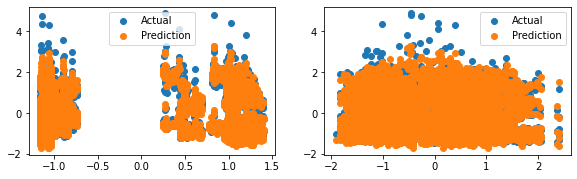



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9527510948708497
Residual Sum of Squares (RSS) on Training set  ---> 212.80906870169244
Mean Squared Error (MSE) on Training set       ---> 0.047248905129150184
Root Mean Squared Error (RMSE) on Training set ---> 0.21736813273603425

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> -4.0128149790525665e+23
Residual Sum of Squares (RSS) on Training set  ---> 7.748745724550509e+26
Mean Squared Error (MSE) on Training set       ---> 4.012814979052568e+23
Root Mean Squared Error (RMSE) on Training set ---> 633467834941.3306

--------------------Residual Plots--------------------


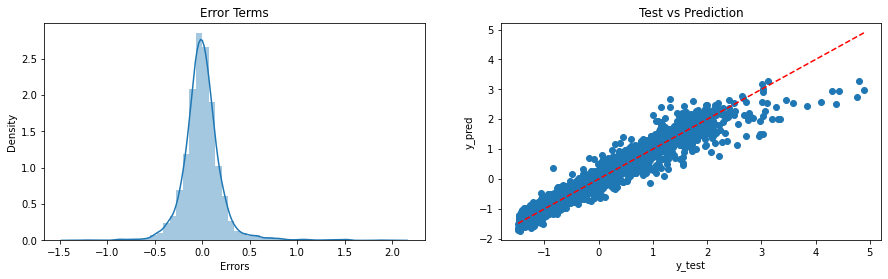

In [111]:
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)
X_poly1 = poly_reg.fit_transform(X_test)
PR = LinearRegression()
PR.fit(X_poly, y_train)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

Evaluate(2, pred1, pred2)